# Clustering Models for NBA Players

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sb

## Import Data

In [2]:
players_full_df = pd.read_csv("./draft_stats.csv")

# Full dataframe
players_full_df = players_full_df.iloc[:,1:12]

# Stats
players_stats_df = players_full_df.iloc[:,1:11]

# Names
players_names_df = players_full_df.iloc[:,0]

In [3]:
players_full_df.head()

,Player,PTS.1,TRB.1,AST.1,FG%,3P%,FT%,WS,BPM
0,Anthony Davis,23.8,10.2,2.3,0.515,0.303,0.794,91.1,6.0
1,Michael Kidd-Gilchrist,8.4,5.4,1.2,0.474,0.272,0.715,21.0,-1.8
2,Bradley Beal,22.1,4.1,4.2,0.456,0.372,0.821,48.9,1.7
3,Dion Waiters,13.1,2.6,2.8,0.412,0.346,0.694,8.8,-2.1
4,Damian Lillard,24.6,4.2,6.6,0.437,0.373,0.893,94.2,4.7


In [4]:
players_stats_df.head()

,PTS.1,TRB.1,AST.1,FG%,3P%,FT%,WS,BPM
0,23.8,10.2,2.3,0.515,0.303,0.794,91.1,6.0
1,8.4,5.4,1.2,0.474,0.272,0.715,21.0,-1.8
2,22.1,4.1,4.2,0.456,0.372,0.821,48.9,1.7
3,13.1,2.6,2.8,0.412,0.346,0.694,8.8,-2.1
4,24.6,4.2,6.6,0.437,0.373,0.893,94.2,4.7


In [5]:
players_names_df.head()

0             Anthony Davis
1    Michael Kidd-Gilchrist
2              Bradley Beal
3              Dion Waiters
4            Damian Lillard
Name: Player, dtype: object

## Scale Data

In [6]:
scaler = StandardScaler()
players_stats_scaled = scaler.fit_transform(players_stats_df)

## PCA Application

In [7]:
pca = PCA()
pca.fit(players_stats_scaled)

print("Components:")
print(pca.components_)
print("Means:")
print(pca.mean_)
print("Explained Variance")
print(pca.explained_variance_ratio_)
print("Explained Variance Cumulative")
print(pca.explained_variance_ratio_.cumsum())

Components:
[[ 0.38161517  0.46148209  0.22401246  0.348418   -0.14895475 -0.08131979
   0.45515196  0.4835946 ]
 [-0.36774808  0.1629685  -0.40136206  0.37787097 -0.48749225 -0.52538111
  -0.06690082 -0.12718064]
 [ 0.18591999  0.00200016  0.67529767 -0.29047396 -0.39448679 -0.40589869
  -0.24466207 -0.21164735]
 [ 0.18387744  0.27766468 -0.07851545  0.01748784  0.70523245 -0.58066039
  -0.20730058 -0.07161066]
 [ 0.19437739  0.44469529 -0.36107122 -0.59203493 -0.15317695  0.03605862
   0.35772016 -0.36174387]
 [-0.46147254 -0.30673427  0.16149882 -0.28152835  0.16163331 -0.37222423
   0.62335404  0.18539317]
 [ 0.56170433 -0.56362456 -0.15800599  0.27299894 -0.03362086 -0.17125894
   0.31859642 -0.36790981]
 [ 0.2906937  -0.27177456 -0.38093978 -0.38320425 -0.19097717 -0.21508331
  -0.25978889  0.63202198]]
Means:
[-1.20616822e-16  7.12735769e-17 -4.38606627e-17 -1.48029737e-15
  3.09765930e-16  9.90976848e-16  8.77213254e-17 -2.19303314e-17]
Explained Variance
[0.41443591 0.27335409

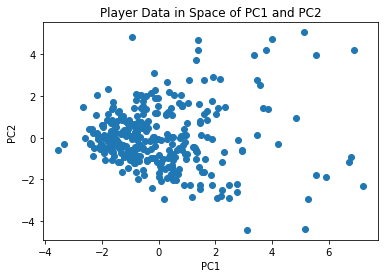

In [8]:
pca_np = pca.transform(players_stats_scaled)
plt.scatter(pca_np[:,0], pca_np[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Player Data in Space of PC1 and PC2');

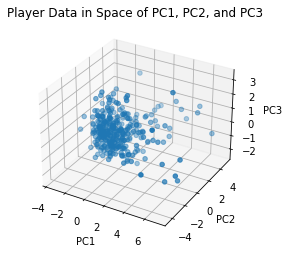

In [9]:
pca_np = pca.transform(players_stats_scaled)

ax = plt.axes(projection='3d')
ax.scatter3D(pca_np[:,0], pca_np[:,1], pca_np[:,2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Player Data in Space of PC1, PC2, and PC3');

# KMeans 3 Components

In [10]:
pca_3comps_df = pd.DataFrame(pca_np[:,0:3])
pca_3comps_df

,0,1,2
0,6.706961,-1.143981,-1.663916
1,0.318809,1.238616,-0.159379
2,2.777713,-2.586924,-0.042793
3,-0.594677,-0.460324,0.966579
4,5.176698,-4.396766,-0.154632
...,...,...,...
319,-0.443307,0.341383,0.490706
320,-2.134172,0.081173,-0.536172
321,-2.372469,-0.294890,-0.285628
322,-1.620982,1.453812,-0.091821


## Evaluating Number of Clusters

In [11]:
dist = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=64)
    kmeans.fit(pca_3comps_df)
    dist.append(kmeans.inertia_)

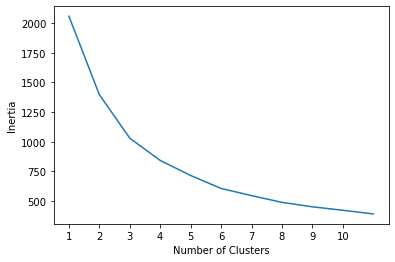

In [12]:
plt.plot(range(1, 12), dist)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

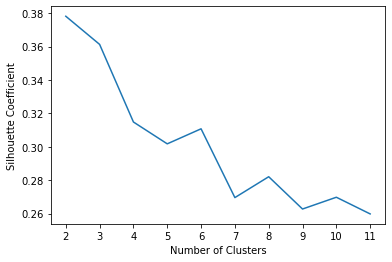

In [13]:
silhouette_coefficients = []

for k in range(2,12):
    kmeans = KMeans(n_clusters=k, random_state=64)
    kmeans.fit(pca_3comps_df)
    score = silhouette_score(pca_3comps_df, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 12), silhouette_coefficients)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

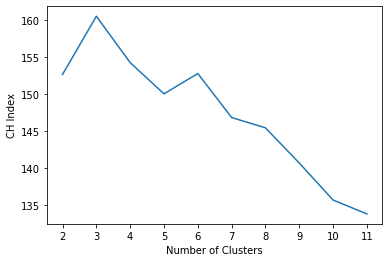

In [14]:
ch_index = []

for k in range(2,12):
    kmeans = KMeans(n_clusters=k, random_state=64)
    kmeans.fit(pca_3comps_df)
    score = calinski_harabasz_score(pca_3comps_df, kmeans.labels_)
    ch_index.append(score)

plt.plot(range(2, 12), ch_index)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("CH Index")
plt.show()

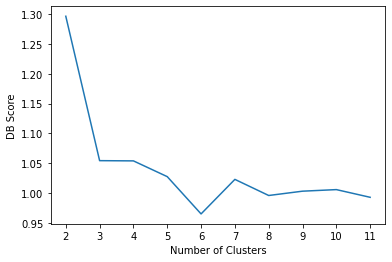

In [15]:
db_score = []

for k in range(2,12):
    kmeans = KMeans(n_clusters=k, random_state=64)
    kmeans.fit(pca_3comps_df)
    score = davies_bouldin_score(pca_3comps_df, kmeans.labels_)
    db_score.append(score)

plt.plot(range(2, 12), db_score)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("DB Score")
plt.show()

K = 6 for 3 components? Inertia want low. Ch Index want high. Silhouette want high. DB want low.

# KMeans 2 Components

In [16]:
pca_2comps_df = pd.DataFrame(pca_np[:,0:2])
# pca_2comps_df

## Evaluating Number of Clusters

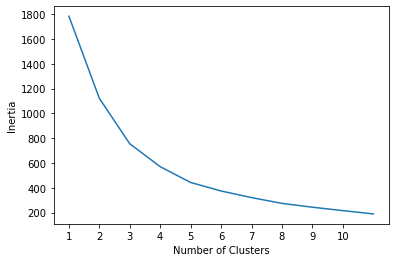

In [17]:
dist = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=64)
    kmeans.fit(pca_2comps_df)
    dist.append(kmeans.inertia_)
    
plt.plot(range(1, 12), dist)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

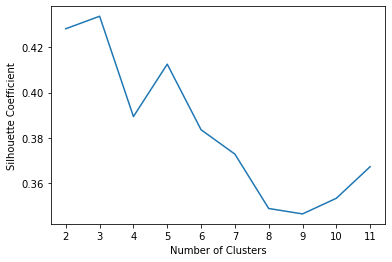

In [18]:
silhouette_coefficients = []

for k in range(2,12):
    kmeans = KMeans(n_clusters=k, random_state=64)
    kmeans.fit(pca_2comps_df)
    score = silhouette_score(pca_2comps_df, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 12), silhouette_coefficients)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

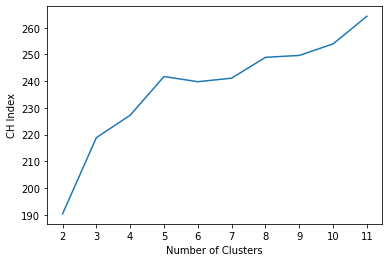

In [19]:
ch_index = []

for k in range(2,12):
    kmeans = KMeans(n_clusters=k, random_state=64)
    kmeans.fit(pca_2comps_df)
    score = calinski_harabasz_score(pca_2comps_df, kmeans.labels_)
    ch_index.append(score)

plt.plot(range(2, 12), ch_index)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("CH Index")
plt.show()

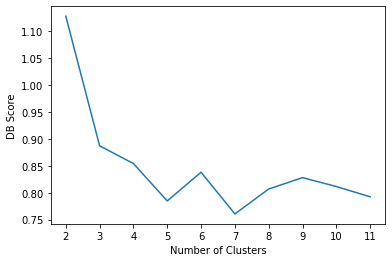

In [20]:
db_score = []

for k in range(2,12):
    kmeans = KMeans(n_clusters=k, random_state=64)
    kmeans.fit(pca_2comps_df)
    score = davies_bouldin_score(pca_2comps_df, kmeans.labels_)
    db_score.append(score)

plt.plot(range(2, 12), db_score)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("DB Score")
plt.show()

K = 5 for two components. Although I like 3 components best.

# K Means Summary

In [21]:
kmeans = KMeans(n_clusters=6, random_state=64)
kmeans.fit(pca_3comps_df)

KMeans(n_clusters=6, random_state=64)

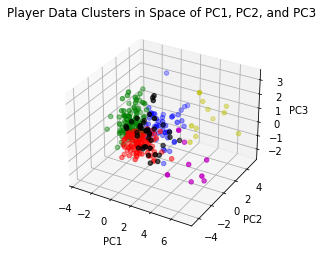

In [22]:
label_color_map = {0: 'r', 1: 'b', 2: 'g', 3:'m', 4:'y', 5:'black'}
label_color = [label_color_map[l] for l in kmeans.labels_]
ax = plt.axes(projection='3d')
ax.scatter3D(pca_np[:,0], pca_np[:,1], pca_np[:,2], c=label_color)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Player Data Clusters in Space of PC1, PC2, and PC3');

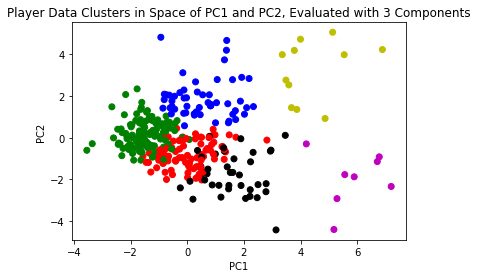

In [23]:
label_color_map = {0: 'r', 1: 'b', 2: 'g', 3:'m', 4:'y', 5:'black'}
label_color = [label_color_map[l] for l in kmeans.labels_]
plt.scatter(pca_np[:,0], pca_np[:,1], c=label_color)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Player Data Clusters in Space of PC1 and PC2, Evaluated with 3 Components');

In [24]:
kmeans_labels_df = pd.DataFrame(kmeans.labels_, columns = ["Label"])
kmeans_df = pd.concat([players_stats_df, kmeans_labels_df], axis=1)
grouper = kmeans_df.groupby("Label")
grouper_agg = grouper.agg({'PTS.1':'mean', 'TRB.1':'mean', 'AST.1':'mean', 
                           'FG%':'mean', '3P%':'mean', 'FT%':'mean', 
                           'WS':'mean', 'BPM':'mean'})
grouper_agg

,PTS.1,TRB.1,AST.1,FG%,3P%,FT%,WS,BPM
Label,,,,,,,,
0,11.117778,3.851111,2.034444,0.447922,0.368300,0.807233,15.924444,-0.451111
1,8.005660,5.167925,1.154717,0.532906,0.271340,0.676642,11.856604,-0.824528
2,7.412195,2.811382,1.748780,0.417862,0.324358,0.749894,3.030894,-2.930081
3,23.812500,9.037500,4.650000,0.512500,0.339000,0.787375,62.037500,5.987500
4,12.145455,8.872727,2.236364,0.606727,0.098727,0.623545,44.181818,2.427273
5,16.825641,4.948718,4.661538,0.444077,0.346923,0.787667,20.787179,0.587179


In [25]:
players_labels_df = pd.concat([players_names_df, kmeans_labels_df], axis = 1)

for i in range(0, 6):
    single_lab_df = players_labels_df[players_labels_df['Label'] == i]
    print(single_lab_df.sample(n = (int) (len(single_lab_df) / 2)))
    print("----------")

                 Player  Label
114        Delon Wright      0
178          Kyle Kuzma      0
240       Rui Hachimura      0
89         Jerami Grant      0
206  Michael Porter Jr.      0
205       Miles Bridges      0
212       Grayson Allen      0
227   De'Anthony Melton      0
301        Franz Wagner      0
6         Terrence Ross      0
75          Dario Šarić      0
139      Taurean Prince      0
128       Norman Powell      0
106        Myles Turner      0
285    Payton Pritchard      0
179       Derrick White      0
282        Tyrese Maxey      0
125     Josh Richardson      0
26          Will Barton      0
104      Frank Kaminsky      0
169        Luke Kennard      0
118          Tyus Jones      0
80          Rodney Hood      0
60         Mike Muscala      0
164     Lauri Markkanen      0
201       Collin Sexton      0
48         Gorgui Dieng      0
68         Aaron Gordon      0
288        Desmond Bane      0
55         Allen Crabbe      0
180           Josh Hart      0
116     

* Label 0: Starting Caliber Shooting Specialist

* Label 1: Mediocre Big Men

* Label 2: Young Role Players

* Label 3: Superstar

* Label 4: Starting Caliber Big Man

* Label 5: "Robins"

# Stick to 3 Components Moving Forward

# BIRCH Model - Hierarchical Clustering

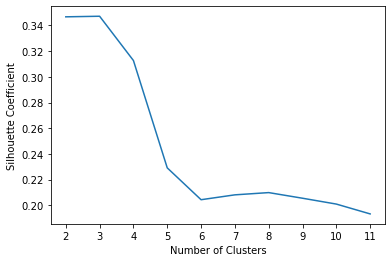

In [26]:
silhouette_coefficients = []

for k in range(2,12):
    birch = Birch(n_clusters=k)
    birch.fit(pca_3comps_df)
    score = silhouette_score(pca_3comps_df, birch.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 12), silhouette_coefficients)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

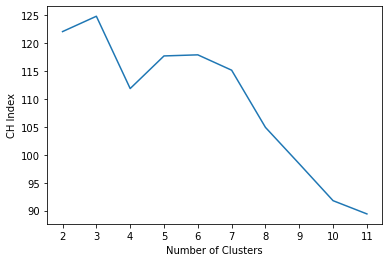

In [27]:
ch_index = []

for k in range(2,12):
    birch = Birch(n_clusters=k)
    birch.fit(pca_3comps_df)
    score = calinski_harabasz_score(pca_3comps_df, birch.labels_)
    ch_index.append(score)

plt.plot(range(2, 12), ch_index)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("CH Index")
plt.show()

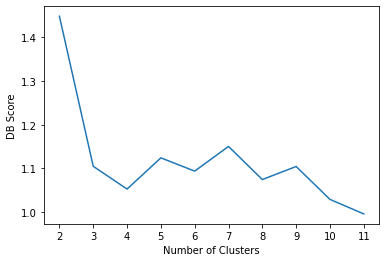

In [28]:
db_score = []

for k in range(2,12):
    birch = Birch(n_clusters=k)
    birch.fit(pca_3comps_df)
    score = davies_bouldin_score(pca_3comps_df, birch.labels_)
    db_score.append(score)

plt.plot(range(2, 12), db_score)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("DB Score")
plt.show()

No clear winner, but I think 6 is sufficient

In [29]:
birch = Birch(n_clusters=6)
birch.fit(pca_3comps_df)

Birch(n_clusters=6)

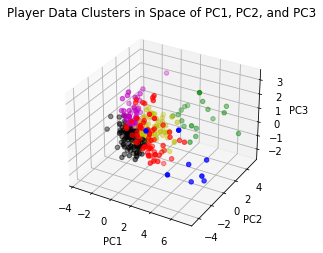

In [30]:
label_color_map = {0: 'r', 1: 'b', 2: 'g', 3:'m', 4:'y', 5:'black'}
label_color = [label_color_map[l] for l in birch.labels_]
ax = plt.axes(projection='3d')
ax.scatter3D(pca_np[:,0], pca_np[:,1], pca_np[:,2], c=label_color)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Player Data Clusters in Space of PC1, PC2, and PC3');

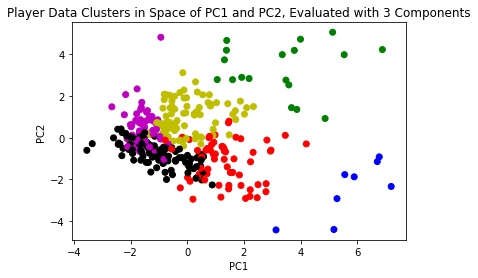

In [31]:
label_color_map = {0: 'r', 1: 'b', 2: 'g', 3:'m', 4:'y', 5:'black'}
label_color = [label_color_map[l] for l in birch.labels_]
plt.scatter(pca_np[:,0], pca_np[:,1], c=label_color)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Player Data Clusters in Space of PC1 and PC2, Evaluated with 3 Components');

In [32]:
birch_labels_df = pd.DataFrame(birch.labels_, columns = ["Label"])
birch_df = pd.concat([players_stats_df, birch_labels_df], axis=1)
grouper = birch_df.groupby("Label")
grouper_agg = grouper.agg({'PTS.1':'mean', 'TRB.1':'mean', 'AST.1':'mean', 
                           'FG%':'mean', '3P%':'mean', 'FT%':'mean', 
                           'WS':'mean', 'BPM':'mean'})
grouper_agg

,PTS.1,TRB.1,AST.1,FG%,3P%,FT%,WS,BPM
Label,,,,,,,,
0,15.221875,5.039062,3.623438,0.458766,0.354781,0.774031,19.839063,0.346875
1,23.737500,8.650000,5.375000,0.491875,0.341750,0.810875,63.812500,5.737500
2,10.244444,7.605556,1.777778,0.600222,0.116389,0.627556,33.494444,1.544444
3,7.233333,2.757895,1.936842,0.419246,0.302193,0.716842,2.207018,-3.300000
4,8.401266,4.732911,1.321519,0.491671,0.313937,0.712823,10.635443,-1.130380
5,9.106122,2.750000,1.850000,0.420490,0.359092,0.817684,8.962245,-1.690816


In [33]:
players_labels_df = pd.concat([players_names_df, birch_labels_df], axis = 1)

for i in range(0, 6):
    single_lab_df = players_labels_df[players_labels_df['Label'] == i]
    print(single_lab_df.sample(n = (int) (len(single_lab_df) / 2)))
    print("----------")

                      Player  Label
73             Elfrid Payton      0
2               Bradley Beal      0
164          Lauri Markkanen      0
197        Jaren Jackson Jr.      0
77               T.J. Warren      0
65            Andrew Wiggins      0
32           Otto Porter Jr.      0
154          Malcolm Brogdon      0
116             Bobby Portis      0
204  Shai Gilgeous-Alexander      0
294          Cade Cunningham      0
5            Harrison Barnes      0
275        Tyrese Haliburton      0
40   Michael Carter-Williams      0
97          D'Angelo Russell      0
99        Kristaps Porziņģis      0
138         Domantas Sabonis      0
264          Anthony Edwards      0
186            Thomas Bryant      0
45           Dennis Schröder      0
24            Draymond Green      0
206       Michael Porter Jr.      0
106             Myles Turner      0
166         Dennis Smith Jr.      0
160             Jayson Tatum      0
201            Collin Sexton      0
42              Kelly Olynyk

* Label 0: Starting Caliber Shooter
* Label 1: Superstar
* Label 2: Solid Rebounder
* Label 3: Too-Soon-To-Tell
* Label 4: Starter
* Label 5: Shooter with poor advanced stats, Watered-Down Label 0, Wannabe Shooter

# Gaussian Mixture Model - Assumes Normalization

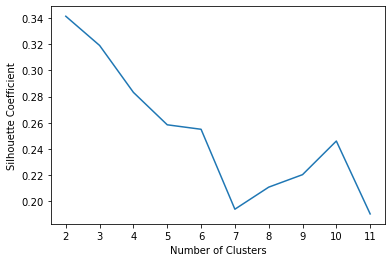

In [34]:
silhouette_coefficients = []

for k in range(2,12):
    gmm = GaussianMixture(n_components=k, random_state=64)
    gmm.fit(pca_3comps_df)
    labels_ = gmm.predict(pca_3comps_df)
    score = silhouette_score(pca_3comps_df, labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 12), silhouette_coefficients)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

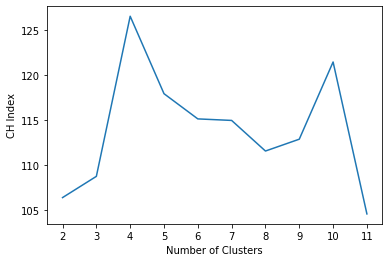

In [35]:
ch_index = []

for k in range(2,12):
    gmm = GaussianMixture(n_components=k, random_state=64)
    gmm.fit(pca_3comps_df)
    labels_ = gmm.predict(pca_3comps_df)
    score = calinski_harabasz_score(pca_3comps_df, labels_)
    ch_index.append(score)

plt.plot(range(2, 12), ch_index)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("CH Index")
plt.show()

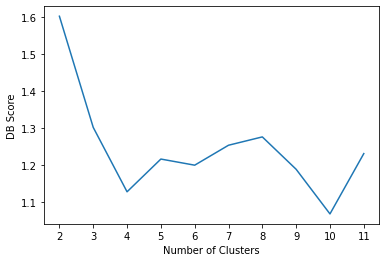

In [36]:
db_score = []

for k in range(2,12):
    gmm = GaussianMixture(n_components=k, random_state=64)
    gmm.fit(pca_3comps_df)
    labels_ = gmm.predict(pca_3comps_df)
    score = davies_bouldin_score(pca_3comps_df, labels_)
    db_score.append(score)

plt.plot(range(2, 12), db_score)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("DB Score")
plt.show()

4 or 10. Let's do both.

In [37]:
gmm = GaussianMixture(n_components=10, random_state=64)
gmm.fit(pca_3comps_df)
labels_ = gmm.predict(pca_3comps_df)

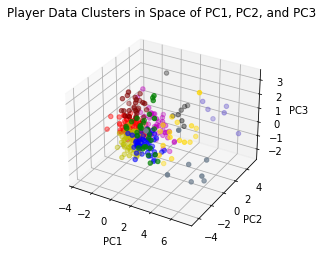

In [38]:
label_color_map = {0: 'r', 1: 'b', 2: 'g', 3:'m', 4:'y', 5:'black', 6:'slategrey',7:'maroon',8:'slateblue',9:'gold'}
label_color = [label_color_map[l] for l in labels_]
ax = plt.axes(projection='3d')
ax.scatter3D(pca_np[:,0], pca_np[:,1], pca_np[:,2], c=label_color)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Player Data Clusters in Space of PC1, PC2, and PC3');

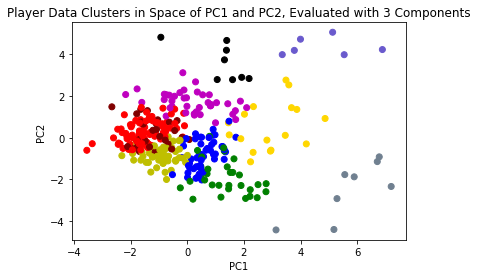

In [39]:
label_color_map = {0: 'r', 1: 'b', 2: 'g', 3:'m', 4:'y', 5:'black', 6:'slategrey',7:'maroon',8:'slateblue',9:'gold'}
label_color = [label_color_map[l] for l in labels_]
plt.scatter(pca_np[:,0], pca_np[:,1], c=label_color)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Player Data Clusters in Space of PC1 and PC2, Evaluated with 3 Components');

In [40]:
gmm_labels_df = pd.DataFrame(labels_, columns = ["Label"])
gmm_df = pd.concat([players_stats_df, gmm_labels_df], axis=1)
grouper = gmm_df.groupby("Label")
grouper_agg = grouper.agg({'PTS.1':'mean', 'TRB.1':'mean', 'AST.1':'mean', 
                           'FG%':'mean', '3P%':'mean', 'FT%':'mean', 
                           'WS':'mean', 'BPM':'mean'})
grouper_agg

,PTS.1,TRB.1,AST.1,FG%,3P%,FT%,WS,BPM
Label,,,,,,,,
0,6.788095,2.913095,1.247619,0.426655,0.329786,0.762381,4.052381,-2.750000
1,12.522000,4.460000,2.224000,0.457840,0.364000,0.794520,19.068000,-0.060000
2,16.812903,4.441935,4.835484,0.437516,0.350710,0.794290,18.700000,0.403226
3,7.850000,4.862500,1.147500,0.515275,0.287825,0.673600,10.205000,-1.272500
4,9.300000,2.738000,1.828000,0.430420,0.370520,0.827480,9.418000,-1.284000
5,7.050000,5.400000,1.012500,0.581375,0.126125,0.627875,14.662500,-0.637500
6,23.737500,8.650000,5.375000,0.491875,0.341750,0.810875,63.812500,5.737500
7,8.676667,3.033333,3.000000,0.408000,0.299167,0.700900,1.830000,-3.173333
8,10.583333,9.450000,1.500000,0.618500,0.042000,0.567667,53.583333,2.383333


In [41]:
players_labels_df = pd.concat([players_names_df, gmm_labels_df], axis = 1)

for i in range(0, 10):
    single_lab_df = players_labels_df[players_labels_df['Label'] == i]
    print(single_lab_df.sample(n = (int) (len(single_lab_df) / 2)))
    print("----------")

                      Player  Label
36              Ben McLemore      0
310             Keon Johnson      0
211              Josh Okogie      0
305             Joshua Primo      0
252            Nassir Little      0
307            Corey Kispert      0
16          Andrew Nicholson      0
46              Shane Larkin      0
202               Kevin Knox      0
225              Bruce Brown      0
69                Dante Exum      0
229         Keita Bates-Diop      0
228           Svi Mykhailiuk      0
219           Omari Spellman      0
223           Rodions Kurucs      0
309                 Tre Mann      0
260              Isaiah Roby      0
83             P.J. Hairston      0
249           Grant Williams      0
113             Jerian Grant      0
107               Trey Lyles      0
145  Timothé Luwawu-Cabarrot      0
304          James Bouknight      0
276           Kira Lewis Jr.      0
258            Eric Paschall      0
193             Kadeem Allen      0
95              Jordan McRae

* Label 0: Young or Unproven Player
* Label 1: 6th Man Type Shooting Specialist
* Label 2: Creative Scorers, "Robin"
* Label 3: Not Very Good Wing
* Label 4: Flamethrower
* Label 5: Traditional Big Man
* Label 6: Elite
* Label 7: Young but promising, similar to 0
* Label 8: Not as much of a winner big man
* Label 9: Defensive Big Men

In [42]:
gmm = GaussianMixture(n_components=4, random_state=64)
gmm.fit(pca_3comps_df)
labels_ = gmm.predict(pca_3comps_df)

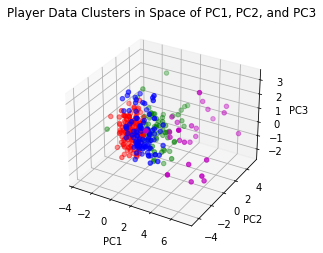

In [43]:
label_color_map = {0: 'r', 1: 'b', 2: 'g', 3:'m'}
label_color = [label_color_map[l] for l in labels_]
ax = plt.axes(projection='3d')
ax.scatter3D(pca_np[:,0], pca_np[:,1], pca_np[:,2], c=label_color)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Player Data Clusters in Space of PC1, PC2, and PC3');

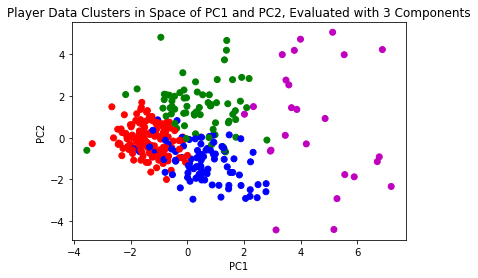

In [44]:
label_color_map = {0: 'r', 1: 'b', 2: 'g', 3:'m'}
label_color = [label_color_map[l] for l in labels_]
plt.scatter(pca_np[:,0], pca_np[:,1], c=label_color)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Player Data Clusters in Space of PC1 and PC2, Evaluated with 3 Components');

In [45]:
gmm_labels_df = pd.DataFrame(labels_, columns = ["Label"])
gmm_df = pd.concat([players_stats_df, gmm_labels_df], axis=1)
grouper = gmm_df.groupby("Label")
grouper_agg = grouper.agg({'PTS.1':'mean', 'TRB.1':'mean', 'AST.1':'mean', 
                           'FG%':'mean', '3P%':'mean', 'FT%':'mean', 
                           'WS':'mean', 'BPM':'mean'})
grouper_agg

,PTS.1,TRB.1,AST.1,FG%,3P%,FT%,WS,BPM
Label,,,,,,,,
0,7.656835,2.823741,1.508633,0.423978,0.341331,0.776626,5.433094,-2.373381
1,13.887912,4.162637,3.557143,0.437604,0.346923,0.783209,15.431868,-0.473626
2,8.282609,4.955072,1.181159,0.516348,0.291797,0.693507,13.244928,-0.834783
3,16.692000,8.640000,3.524000,0.546560,0.224120,0.702080,46.160000,3.336000


In [46]:
players_labels_df = pd.concat([players_names_df, gmm_labels_df], axis = 1)

for i in range(0, 5):
    single_lab_df = players_labels_df[players_labels_df['Label'] == i]
    print(single_lab_df.sample(n = (int) (len(single_lab_df) / 2)))
    print("----------")

              Player  Label
262     Terance Mann      0
250    Darius Bazley      0
127  Andrew Harrison      0
142    Malik Beasley      0
165  Frank Ntilikina      0
..               ...    ...
80       Rodney Hood      0
46      Shane Larkin      0
6      Terrence Ross      0
119    Jarell Martin      0
9     Meyers Leonard      0

[69 rows x 2 columns]
----------
                       Player  Label
302           Davion Mitchell      1
282              Tyrese Maxey      1
234                RJ Barrett      1
39                CJ McCollum      1
244               Tyler Herro      1
166          Dennis Smith Jr.      1
94            Jordan Clarkson      1
131              Jaylen Brown      1
23                Jae Crowder      1
68               Aaron Gordon      1
73              Elfrid Payton      1
84          Bogdan Bogdanović      1
264           Anthony Edwards      1
114              Delon Wright      1
159                Lonzo Ball      1
295               Jalen Green      1
3

* Label 0: Young and Unproven
* Label 1: Starting Caliber
* Label 2: Strong Rebounder but Poor Shooter
* Label 3: All Star Caliber

# K Medoids

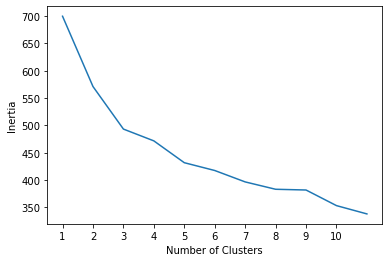

In [47]:
dist = []
for k in range(1, 12):
    kmeans = KMedoids(n_clusters=k, random_state=64)
    kmeans.fit(pca_3comps_df)
    dist.append(kmeans.inertia_)
    
plt.plot(range(1, 12), dist)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

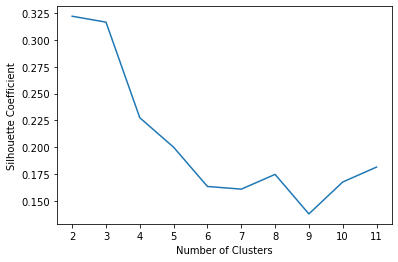

In [48]:
silhouette_coefficients = []

for k in range(2,12):
    kmeans = KMedoids(n_clusters=k, random_state=64)
    kmeans.fit(pca_3comps_df)
    score = silhouette_score(pca_3comps_df, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 12), silhouette_coefficients)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

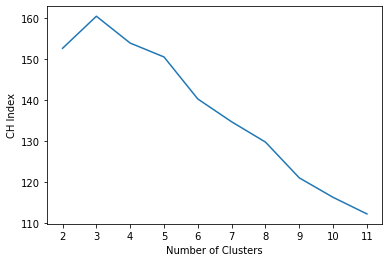

In [50]:
ch_index = []

for k in range(2,12):
    kmeans = KMeans(n_clusters=k, random_state=64)
    kmeans.fit(pca_2comps_df)
    score = calinski_harabasz_score(pca_3comps_df, kmeans.labels_)
    ch_index.append(score)

plt.plot(range(2, 12), ch_index)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("CH Index")
plt.show()

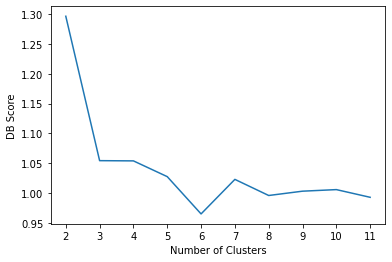

In [51]:
db_score = []

for k in range(2,12):
    kmeans = KMeans(n_clusters=k, random_state=64)
    kmeans.fit(pca_3comps_df)
    score = davies_bouldin_score(pca_3comps_df, kmeans.labels_)
    db_score.append(score)

plt.plot(range(2, 12), db_score)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("DB Score")
plt.show()

Select k=6

In [52]:
kmeds = KMedoids(n_clusters=6, random_state=64)
kmeds.fit(pca_3comps_df)

KMedoids(n_clusters=6, random_state=64)

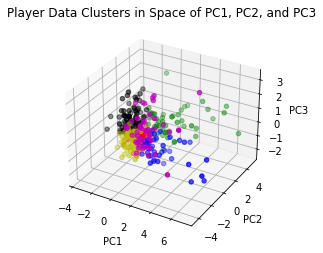

In [53]:
label_color_map = {0: 'r', 1: 'b', 2: 'g', 3:'m', 4:'y', 5:'black'}
label_color = [label_color_map[l] for l in kmeds.labels_]
ax = plt.axes(projection='3d')
ax.scatter3D(pca_np[:,0], pca_np[:,1], pca_np[:,2], c=label_color)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Player Data Clusters in Space of PC1, PC2, and PC3');

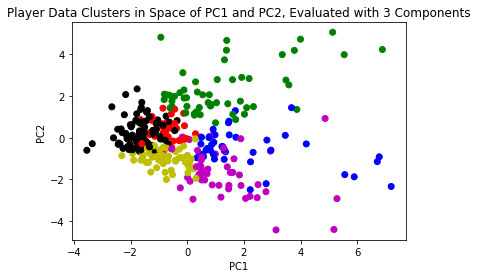

In [54]:
label_color_map = {0: 'r', 1: 'b', 2: 'g', 3:'m', 4:'y', 5:'black'}
label_color = [label_color_map[l] for l in kmeds.labels_]
plt.scatter(pca_np[:,0], pca_np[:,1], c=label_color)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Player Data Clusters in Space of PC1 and PC2, Evaluated with 3 Components');

In [55]:
kmeds_labels_df = pd.DataFrame(kmeds.labels_, columns = ["Label"])
kmeds_df = pd.concat([players_stats_df, kmeds_labels_df], axis=1)
grouper = kmeds_df.groupby("Label")
grouper_agg = grouper.agg({'PTS.1':'mean', 'TRB.1':'mean', 'AST.1':'mean', 
                           'FG%':'mean', '3P%':'mean', 'FT%':'mean', 
                           'WS':'mean', 'BPM':'mean'})
grouper_agg

,PTS.1,TRB.1,AST.1,FG%,3P%,FT%,WS,BPM
Label,,,,,,,,
0,7.371429,3.660000,1.040000,0.464629,0.342771,0.771171,8.691429,-1.557143
1,14.395238,6.395238,2.219048,0.492714,0.357976,0.772024,30.954762,1.354762
2,8.675926,5.868519,1.255556,0.545889,0.227556,0.659537,17.442593,-0.364815
3,16.366667,4.470833,4.739583,0.441833,0.342833,0.786292,18.481250,0.420833
4,10.076786,2.842857,2.100000,0.427286,0.369982,0.825911,10.444643,-1.135714
5,7.144944,2.716854,1.803371,0.409854,0.317494,0.737112,2.350562,-3.219101


In [57]:
players_labels_df = pd.concat([players_names_df, kmeds_labels_df], axis = 1)

for i in range(0, 6):
    single_lab_df = players_labels_df[players_labels_df['Label'] == i]
    print(single_lab_df.sample(n = (int) (len(single_lab_df) / 2)))
    print("----------")

                Player  Label
14        Tyler Zeller      0
258      Eric Paschall      0
307      Corey Kispert      0
216      Moritz Wagner      0
64   Joffrey Lauvergne      0
16    Andrew Nicholson      0
19        John Jenkins      0
163     Jonathan Isaac      0
249     Grant Williams      0
252      Nassir Little      0
240      Rui Hachimura      0
43    Shabazz Muhammad      0
27          Mike Scott      0
219     Omari Spellman      0
110    Kelly Oubre Jr.      0
262       Terance Mann      0
148    Skal Labissière      0
----------
                 Player  Label
75          Dario Šarić      1
173        John Collins      1
5       Harrison Barnes      1
23          Jae Crowder      1
116        Bobby Portis      1
254      Keldon Johnson      1
147       Pascal Siakam      1
96   Karl-Anthony Towns      1
32      Otto Porter Jr.      1
0         Anthony Davis      1
205       Miles Bridges      1
66        Jabari Parker      1
206  Michael Porter Jr.      1
99   Kristaps P

* Label 0: Young player
* Label 1: Solid Forwards
* Label 2: Promising Big Men
* Label 3: Electrifying Playmakers
* Label 4: Flamethrowers
* Label 5: Unproven

# DBScan

# Overall Summary

Robbie:
I like the KMeans model with 6 as the clear winner for the number of categories for broad analysis. For a more specific analysis, I think the Gaussian Mixture Model does the best at finding 10 unique classes. K Medoids gives a basic outlook.

# Future Work

I think we can try to use these models to predict all star caliber?
More specific evaluation?